<a href="https://colab.research.google.com/github/aadhityasw/Minority-Report/blob/main/Crime-Analysis/Boston_Crime_Prediction_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Crime Prediction Analysis

## 1. Import files and libraries

Here, we load the dataset and have a quick look at its features.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

# Copy the file from your drive to "/content"
%cp "/content/drive/My Drive/crime.csv" "/content/crime.csv"

Mounted at /content/drive


In [3]:
df = pd.read_csv('crime.csv', encoding='latin-1')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [4]:
# To learn more about the dataset imported
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327820 entries, 0 to 327819
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      327820 non-null  object 
 1   OFFENSE_CODE         327820 non-null  int64  
 2   OFFENSE_CODE_GROUP   327820 non-null  object 
 3   OFFENSE_DESCRIPTION  327820 non-null  object 
 4   DISTRICT             326046 non-null  object 
 5   REPORTING_AREA       327820 non-null  object 
 6   SHOOTING             1055 non-null    object 
 7   OCCURRED_ON_DATE     327820 non-null  object 
 8   YEAR                 327820 non-null  int64  
 9   MONTH                327820 non-null  int64  
 10  DAY_OF_WEEK          327820 non-null  object 
 11  HOUR                 327820 non-null  int64  
 12  UCR_PART             327727 non-null  object 
 13  STREET               316843 non-null  object 
 14  Lat                  307188 non-null  float64
 15  Long             

## 2. Pre Processing of dataset

In this section, we create a copy of the dataset, perform the required pre-processing tasks to get the dataset ready for training.

### 2.1 Make a copy of the dataset

In this section, we create a copy of the dataset and use this to perform the pre-processing and then the Modelling

In [90]:
# Create a model

df_model = df.copy()

### 2.2 Minimize the dataset by Prioritization of crimes

We choose the top `15` categories of crimes and minimize the dataset based on these. This is done so as to simplify the task and to deliver a model as fast as possible, and this model once successful can be scaled later for all categories of crimes.

In [91]:
# We extract the top 15 crimes by their count of occurance

df_model['OFFENSE_CODE_GROUP'].value_counts().head(15)

Motor Vehicle Accident Response    38134
Larceny                            26670
Medical Assistance                 24226
Investigate Person                 19176
Other                              18612
Drug Violation                     17037
Simple Assault                     16263
Vandalism                          15810
Verbal Disputes                    13478
Towed                              11632
Investigate Property               11443
Larceny From Motor Vehicle         11120
Property Lost                      10077
Warrant Arrests                     8579
Aggravated Assault                  8033
Name: OFFENSE_CODE_GROUP, dtype: int64

In [92]:
# This is the list of all the categories we are going to choose

choosen_offense_code_groups = (
    'Motor Vehicle Accident Response',
    'Larceny',
    'Medical Assistance',
    'Investigate Person',
    'Other',
    'Drug Violation',
    'Simple Assault',
    'Vandalism',
    'Verbal Disputes',
    'Towed',
    'Investigate Property',
    'Larceny From Motor Vehicle'
)

In [93]:
# Create a minimised dataframe to store the values of crimes belonging to only these categories

df_model = df.loc[df['OFFENSE_CODE_GROUP'].isin(choosen_offense_code_groups)]

In [94]:
# Print this Miniatured dataset to understand its size

df_model.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
5,I182080049,1402,Vandalism,VANDALISM,C11,351,NaN,2018-10-02 20:40:00,2018,10,Tuesday,20,Part Two,DORCHESTER AVE,42.299197,-71.060470,"(42.29919694, -71.06046974)"
6,I182080048,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,NaN,,NaN,2018-10-03 20:16:00,2018,10,Wednesday,20,Part Three,NaN,42.320734,-71.056764,"(42.32073413, -71.05676415)"
7,I182080047,3301,Verbal Disputes,VERBAL DISPUTE,B2,603,NaN,2018-10-03 19:32:00,2018,10,Wednesday,19,Part Three,TREMONT ST,42.333807,-71.103778,"(42.33380683, -71.10377843)"
8,I182080045,802,Simple Assault,ASSAULT SIMPLE - BATTERY,E18,543,NaN,2018-10-03 19:27:51,2018,10,Wednesday,19,Part Two,AVILA RD,42.256145,-71.128025,"(42.25614494, -71.12802506)"


### 2.3 Converting Date of Occurance

In this section, we will take the date in string, convert it into a python-datetime object, adn use it to extract the month, year, day of week and hour from this timestamp. Note that this has already been done.

In [95]:
# Convert the date in string into a pandas timestamp

df_model['OCCURRED_ON_DATE'] = pd.to_datetime(df_model['OCCURRED_ON_DATE'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 2.4 Choose Necessary Columns

In this section, we trim the columns of the dataset and extract only the necessary and useful columns from the dataset which might help in the Machine Learning Predictions

In [96]:
# This is the list of columns that we choose

choosen_columns = [
    'DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK', 'HOUR',
    'UCR_PART', 'Lat','Long', 'OFFENSE_CODE_GROUP', 'OFFENSE_CODE'
]

In [97]:
# We trim the dataset with this choosen set of columns

df_model = df_model[choosen_columns]

In [98]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223601 entries, 2 to 327813
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   DISTRICT            222350 non-null  object 
 1   REPORTING_AREA      223601 non-null  object 
 2   MONTH               223601 non-null  int64  
 3   DAY_OF_WEEK         223601 non-null  object 
 4   HOUR                223601 non-null  int64  
 5   UCR_PART            223601 non-null  object 
 6   Lat                 208742 non-null  float64
 7   Long                208742 non-null  float64
 8   OFFENSE_CODE_GROUP  223601 non-null  object 
 9   OFFENSE_CODE        223601 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 18.8+ MB


### 2.5  Map the offences to Day-time and Night-time

We use the points taken out from the timestamp above which are the month and the hour of occurance and use these to map the crime to whether it was committed in day time or during the night.

This can give insights to whether a trend exists corresponding to crimes and the time of day.

We consider the daylight savings schedules to map the day and night for every month of the year into being `day` or `night`.

In [99]:
# Create new columns which have 0 or 1 values denoting whether it was day or night
# These are one hot encoded values

df_model['Day'] = 0
df_model['Night'] = 0

In [100]:
# Map the daytime for each month based on the boston schedules of daylight savings, etc

# Determining Daytime for January
df_model['Day'].loc[(df_model['MONTH'] == 1) & (df_model['HOUR'] >= 6) & (df_model['HOUR'] <= 18)] = 1

# Determining Daytime for Feburary
df_model['Day'].loc[(df_model['MONTH'] == 2) & (df_model['HOUR'] >= 6) & (df_model['HOUR'] <= 19)] = 1

# Determining Daytime for March
df_model['Day'].loc[(df_model['MONTH'] == 3) & (df_model['HOUR'] >= 6) & (df_model['HOUR'] <= 20)] = 1

# Determining Daytime for April
df_model['Day'].loc[(df_model['MONTH'] == 4) & (df_model['HOUR'] >= 5) & (df_model['HOUR'] <= 20)] = 1

# Determining Daytime for May
df_model['Day'].loc[(df_model['MONTH'] == 5) & (df_model['HOUR'] >= 5) & (df_model['HOUR'] <= 21)] = 1

# Determining Daytime for June
df_model['Day'].loc[(df_model['MONTH'] == 6) & (df_model['HOUR'] >= 4) & (df_model['HOUR'] <= 21)] = 1

# Determining Daytime July
df_model['Day'].loc[(df_model['MONTH'] == 7) & (df_model['HOUR'] >= 5) & (df_model['HOUR'] <= 21)] = 1

# Determining Daytime for August
df_model['Day'].loc[(df_model['MONTH'] == 8) & (df_model['HOUR'] >= 5) & (df_model['HOUR'] <= 21)] = 1

# Determining Daytime for September
df_model['Day'].loc[(df_model['MONTH'] == 9) & (df_model['HOUR'] >= 6) & (df_model['HOUR'] <= 20)] = 1

# Determining Daytime for October
df_model['Day'].loc[(df_model['MONTH'] == 10) & (df_model['HOUR'] >= 6) & (df_model['HOUR'] <= 19)] = 1

# Determining Daytime for November
df_model['Day'].loc[(df_model['MONTH'] == 11) & (df_model['HOUR'] >= 6) & (df_model['HOUR'] <= 17)] = 1

# Determining Daytime for December
df_model['Day'].loc[(df_model['MONTH'] == 12) & (df_model['HOUR'] >= 7) & (df_model['HOUR'] <= 17)] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [101]:
# Map the night time of the crimes
# We use the fact that : If a record (crime row in dataset) has occured during the day, then it does not occur during the night and vice versa

df_model['Night'].loc[df_model['Day']==0]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### 2.6 Map the District values

We convert the district values which are its codes into numerical values as it better represents the districts during the training phase.

In [102]:
# Find all the unique values of district codes

df_model['DISTRICT'].unique()

array(['B2', 'C11', nan, 'E18', 'D4', 'D14', 'B3', 'C6', 'E13', 'A1',
       'A7', 'A15', 'E5'], dtype=object)

In [103]:
# Map these district codes to numerical values

df_model['DISTRICT'] = df_model['DISTRICT'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

### 2.7 Map the "Reporting Area" to numerical values

We perform the same process as done for "District" values so as to keep these suitable for training phase

In [104]:
# To know the number of unique values of "Reporting areas"

len(df_model['REPORTING_AREA'].unique())

880

In [105]:
# We map these 880 values of "Reporting areas" into numerical values

df_model['REPORTING_AREA'] = pd.to_numeric(df_model['REPORTING_AREA'], errors='coerce')

### 2.8 Map the "Day of Week" into Numerical Values

As done for the above columns, we map the days of the week into numerical values from `1` to `7`

In [106]:
# Map the days of the week into numerical values

df_model['DAY_OF_WEEK'] = df_model['DAY_OF_WEEK'].map({
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
})

### 2.9 Map the "Offence Group" into Numerical Values

In [107]:
# Create a map for the offence groups

offence_code_groups_mapping = {
    'Motor Vehicle Accident Response':1, 
    'Larceny':2, 
    'Medical Assistance':3,
    'Investigate Person':4, 
    'Other':5, 
    'Drug Violation':6, 
    'Simple Assault':7,
    'Vandalism':8, 
    'Verbal Disputes':9, 
    'Towed':10, 
    'Investigate Property':11,
    'Larceny From Motor Vehicle':12
}

In [108]:
# Map these values

df_model['OFFENSE_CODE_GROUP'] = df_model['OFFENSE_CODE_GROUP'].map(offence_code_groups_mapping)

### 2.10 Map `OFFENCE_CODE` Into Numerical Values

In this section, we make sure that all the values in this column are numbers.
Almost all the values here are numbers already, so this section is just a precaution.

In [109]:
# View the list of all offense codes

df_model['OFFENSE_CODE'].value_counts()

3006    19360
3115    19176
3831    16730
1402    15542
802     15199
        ...  
637         1
624         1
627         1
634         1
1864        1
Name: OFFENSE_CODE, Length: 93, dtype: int64

In [110]:
# Map the values of the "Offence Codes"

df_model['OFFENSE_CODE'] = pd.to_numeric(df_model['OFFENSE_CODE'], errors='coerce')

### 2.11 Map the `UCR Part` into Numerical Values

The `UCR_PART` is for the Uniform Crime Reporting Format which denotes the seriousness of the crime.

In [111]:
# View the unique values for this parameter

df_model['UCR_PART'].unique()

array(['Part Two', 'Part Three', 'Part One', 'Other'], dtype=object)

In [112]:
# Create a map for these values

ucr_part_map = {
    'Part Three':3, 
    'Part One':1, 
    'Part Two':2, 
    #'Other':4
}

In [113]:
# Map these values into numbers

df_model['UCR_PART'] = df_model['UCR_PART'].map(ucr_part_map)

In [114]:
df_model['UCR_PART'].unique()

array([ 2.,  3.,  1., nan])

### 2.12 Pre-Processed Dataset

In [115]:
# View the final model which will be used for training

df_model

,DISTRICT,REPORTING_AREA,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,OFFENSE_CODE_GROUP,OFFENSE_CODE,Day,Night
2,3.0,329.0,10,3,19,2.0,42.308126,-71.076930,5,2647,1,0
5,8.0,351.0,10,2,20,2.0,42.299197,-71.060470,8,1402,0,1
6,NaN,NaN,10,3,20,3.0,42.320734,-71.056764,1,3803,0,1
7,3.0,603.0,10,3,19,3.0,42.333807,-71.103778,9,3301,1,0
8,2.0,543.0,10,3,19,2.0,42.256145,-71.128025,7,802,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
327797,3.0,318.0,10,5,21,2.0,42.311277,-71.089093,7,802,0,1
327799,9.0,285.0,6,7,17,1.0,42.336951,-71.085748,2,629,1,0
327811,11.0,111.0,8,3,12,2.0,42.352312,-71.063705,6,1848,1,0
327812,11.0,111.0,8,3,12,2.0,42.352312,-71.063705,6,1849,1,0


In [116]:
# There are a few NULL values in these columns
# Each Method we take up in section 5 will have their own ways of handling these null values, so this is not touched upon here

df_model.isnull().sum()

DISTRICT               1251
REPORTING_AREA        15385
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART                 26
Lat                   14859
Long                  14859
OFFENSE_CODE_GROUP        0
OFFENSE_CODE              0
Day                       0
Night                     0
dtype: int64

## 3. Algorithms Design

In this section, we define the Classification Algorithms that we will be using to perform the training

In [185]:
# Import the classifiers used for creating the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.semi_supervised import LabelSpreading
#from sklearn.svm import LinearSVC
#from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Import the metrics libraries for comparinf the results from these algorithms
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score

# Import plotting tools for plotting the scores obtained by the different algorithms
import matplotlib.pyplot as plt

# Import libraries for statistical calculations
from statistics import mean

### 3.1 Results Evaluation

We will define a function which takes in the result of a particlar algorithm and then uses it to find the scores based on the specfied evaluation metrics.

In [118]:
def fun_results(result):
    print('mean: ' + str(result.mean()))
    print('max: ' + str(result.max()))
    print('min: ' + str(result.min()))
    return result

# Create a class for each type of ML classification we will do
# Each model will use this object to put in their scores into this
# We can later take all the scores for a category of classification to print the final result

In [207]:
class MLResultsAnalysis :

    def __init__(self) :
        """
        Initializes a dictoonary to store the results of all algorithms for a particular scenario
        """

        # Initialize a variable to store the overall results
        self.results = {}

        # Initialize the list of metrics available to plot
        self.metrics_available = ["precision", "recall", "accuracy", "f1"]


    def calcPrecisionScore(self, Y_pred, Y_test) :
        """
        Given the predicted and correct values of output parameter, calculates the precision score of prediction.

        Parameters
        ----------
        Y_pred - The Predictions made by the algorithm
        Y_test - The actual values of Y whose  was fed into the model to give out the prediction Y_pred

        Return
        ------
        The Precision Score across all labels
        """

        return precision_score(Y_test, Y_pred, average='weighted', zero_division=1).max()
    

    def calcRecallScore(self, Y_pred, Y_test) :
        """
        Given the predicted and correct values of output parameter, calculates the recall score of prediction.

        Parameters
        ----------
        Y_pred - The Predictions made by the algorithm
        Y_test - The actual values of Y whose  was fed into the model to give out the prediction Y_pred

        Return
        ------
        The Recall Score across all labels
        """

        return recall_score(Y_test, Y_pred, average='weighted').max()
    

    def calcF1Score(self, Y_pred, Y_test) :
        """
        Given the predicted and correct values of output parameter, calculates the F1 score of prediction.

        Parameters
        ----------
        Y_pred - The Predictions made by the algorithm
        Y_test - The actual values of Y whose  was fed into the model to give out the prediction Y_pred

        Return
        ------
        The F1 Score across all labels
        """

        return f1_score(Y_test, Y_pred, average=None).max()
    

    def calcAccuracyScore(self, Y_pred, Y_test) :
        """
        Given the predicted and correct values of output parameter, calculates the accuracy score of prediction.

        Parameters
        ----------
        Y_pred - The Predictions made by the algorithm
        Y_test - The actual values of Y whose  was fed into the model to give out the prediction Y_pred

        Return
        ------
        The Score across all labels
        """

        return accuracy_score(Y_test, Y_pred)
    

    def calcConfusionMatrix(self, Y_pred, Y_test) :
        """
        Given the predicted and correct values of output parameter, calculates the confusion matrix for the prediction.

        Parameters
        ----------
        Y_pred - The Predictions made by the algorithm
        Y_test - The actual values of Y whose  was fed into the model to give out the prediction Y_pred

        Return
        ------
        The Confusion Matrix
        """

        return confusion_matrix(Y_test, Y_pred)


    def addResult(self, algo_name, Y_pred, Y_test) :
        """
        Given the prediction values of an algorithm, calculates and stores the metric scores of the prediction made.

        Parameters
        ----------
        algo_name - Name of the ML Algorithm which has invoked this function
        Y_pred - The Predictions made by the algorithm
        Y_test - The actual values of Y whose  was fed into the model to give out the prediction Y_pred
        """

        # Initialize a dictionary to store all the calculated scores for this algorithm
        cur_results = {}
        
        # Add in the Precision score
        cur_results["precision"] = self.calcPrecisionScore(Y_pred, Y_test)

        # Add in the Recall score
        cur_results["recall"] = self.calcRecallScore(Y_pred, Y_test)

        # Add in the Accuracy score
        cur_results["accuracy"] = self.calcAccuracyScore(Y_pred, Y_test)

        # Add in the F1 score
        cur_results["f1"] = self.calcF1Score(Y_pred, Y_test)

        # Add in the Confusion Matrix
        cur_results["confusion_matrix"] = self.calcConfusionMatrix(Y_pred, Y_test)

        # Store the scores of this algorithm into the class variable, for consolidation of all algorithms for a particular scenario
        self.results[algo_name] = cur_results
    

    def plotScores(self) :
        """
        After calculating the scores of all the algorithms, plots the scores in a graph.
        """

        # Initialize an empty array to stores the like metric scores of all algorithms
        scores = {item : [] for item in self.metrics_available}

        # Initialize an array to store the names of all the algorithms used
        algorithms_available = []

        # Fill the algorithms and scores data structure
        for key, value in self.results.items() :
            algorithms_available.append(key)
            for metric in self.metrics_available :
                scores[metric].append(value[metric])
        
        # We will be making 4 sub-plots one for each metric
        for i, metric in enumerate(self.metrics_available) :
            # Initialize the sub-plot
            plt.subplot(2, 2, i+1)

            # Plot the metric's scores
            plt.plot(algorithms_available, scores[metric])

            # Set the labels and titles
            plt.xlabel("ML Algorithms")
            plt.ylabel(metric + " score")
            plt.title(metric + " Scores")
    

    def displayResults(self) :
        """
        After the calculations, this function prints the results of all the algorithms and their metrics.
        """

        # Print the results for each algorithm
        for key, value in self.results.items() :
            name = " ".join([word.capitalize() for word in key.split("_")]) + " Classifier"
            print(name)
            print("--------------------------------")
            for i, metric in enumerate(self.metrics_available) :
                print(f"{metric} : {self.results[key][metric]}")
            print("---------------------------------------------------------------------------------------------\n\n")

### 3.2 Decision Trees

In [135]:
def DecisionTreeClassifier_Model(X_train, Y_train, X_test, Y_test, result_obj=MLResultsAnalysis()):

    # Create a Decision Tree Classification Model and fit it on the training data
    dec_tree_clf = DecisionTreeClassifier().fit(X_train, Y_train)
    Y_pred = dec_tree_clf.predict(X_test)

    result_obj.addResult("decision_tree", Y_pred, Y_test)

### 3.3 Random Forest Classifier

In [136]:
def RandomForestClassifier_Model(X_train, Y_train, X_test, Y_test, result_obj=None):

    # Create a Random Forest Classification Model and fit it on the training data
    random_forest_clf = RandomForestClassifier().fit(X_train, Y_train)
    Y_pred = random_forest_clf.predict(X_test)

    result_obj.addResult("random_forest", Y_pred, Y_test)

### 3.4 Extra Tree Classifier

**Extra Tree Classifier** is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. 

In [137]:
def ExtraTreeClassifier_Model(X_train, Y_train, X_test, Y_test, result_obj=None):

    # Create a Extra Tree Classification Model and fit it on the training data
    ext_tree_clf = ExtraTreeClassifier().fit(X_train, Y_train)
    Y_pred = ext_tree_clf.predict(X_test)

    result_obj.addResult("extra_tree", Y_pred, Y_test)

### 3.5 K-Nearest Neighbor Classifier

In [123]:
def KNearestNeighborsClassifier_Model(X_train, Y_train, X_test, Y_test, result_obj=None):

    # Create a K - Nearest Neighbor Classification Model and fit it on the training data
    k_neighbor_clf = KNeighborsClassifier().fit(X_train, Y_train) 
    Y_pred = k_neighbor_clf.predict(X_test)

    result_obj.addResult("k_nearest_neighbor", Y_pred, Y_test)

### 3.6 Bernoulli Naive Bayes Classifier

In [124]:
def BernoulliNB_Model(X_train, Y_train, X_test, Y_test, result_obj=None):

    # Create a Bernoulli Naive Bayes Classification Model and fit it on the training data
    bernoulli_clf = BernoulliNB().fit(X_train, Y_train)
    Y_pred = bernoulli_clf.predict(X_test)

    result_obj.addResult("bernoulli_naive_bayes", Y_pred, Y_test)

### 3.7 Gaussian Naive Bayes Classifier

In [125]:
def GaussianNB_Model(X_train, Y_train, X_test, Y_test, result_obj=None):

    # Create a Gaussian Naive Bayes Classification Model and fit it on the training data
    gauss_clf = GaussianNB().fit(X_train, Y_train)
    Y_pred = gauss_clf.predict(X_test)

    result_obj.addResult("gaussian_naive_bayes", Y_pred, Y_test)

### 3.8 Light GBM Classifier

**Light GBM** is a gradient boosting framework that uses tree based learning algorithm. (Light Gradient Boosting Machine).
Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. 

In [126]:
def LGBM_Model(X_train, Y_train, X_test, Y_test, result_obj=None):

    # Create a Light GBM Classification Model and fit it on the training data
    lgbm_clf = LGBMClassifier().fit(X_train, Y_train)
    Y_pred = lgbm_clf.predict(X_test)

    result_obj.addResult("light_gbm", Y_pred, Y_test)

## 4. Modelling Scenarios

In this section, we take up different scenarios in which ML based Pedictions can be useful, and what they mean for us, and also how the different classification models perform for these scenarios.

### 4.1 Prediction of Future Crime Offence Categories

In this section, we will explore the possibility of being able to predict the "Offence Group" of the crime that might happen in the future based on parameters like `date`, `time`, `location`, etc

In [187]:
# Create a copy of the dataset for this modelling

df_model_1 = df_model.copy()

In [188]:
# Handle the NULL values by replacing them to zeros

df_model_1.fillna(0, inplace = True)

In [189]:
# Partition the columns into input and output variables for making predictions
# X_1 => Input set of parameters
# Y_1 => Output variable

X_1 = df_model_1[['DISTRICT','REPORTING_AREA','MONTH','DAY_OF_WEEK','HOUR','Lat','Long','Day','Night']]
Y_1 = df_model_1['OFFENSE_CODE_GROUP']

In [190]:
# Split the dataframe into random train and test subsets

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(
    X_1,
    Y_1, 
    test_size = 0.1,
    random_state=42
)

print(f"Train Set Shape : ({X_train_1.shape}, {Y_train_1.shape})")
print(f"Test Set Shape : ({X_test_1.shape}, {Y_test_1.shape})")

Train Set Shape : ((201240, 9), (201240,))
Test Set Shape : ((22361, 9), (22361,))


In [214]:
# Create an object to store the results

model_1_results = MLResultsAnalysis()

In [215]:
# Modelling based on different algorithms

DecisionTreeClassifier_Model(X_train_1, Y_train_1, X_test_1, Y_test_1, model_1_results)
RandomForestClassifier_Model(X_train_1, Y_train_1, X_test_1, Y_test_1, model_1_results)
ExtraTreeClassifier_Model(X_train_1, Y_train_1, X_test_1, Y_test_1, model_1_results)
KNearestNeighborsClassifier_Model(X_train_1, Y_train_1, X_test_1, Y_test_1, model_1_results)
BernoulliNB_Model(X_train_1, Y_train_1, X_test_1, Y_test_1, model_1_results)
GaussianNB_Model(X_train_1, Y_train_1, X_test_1, Y_test_1, model_1_results)
LGBM_Model(X_train_1, Y_train_1, X_test_1, Y_test_1, model_1_results)

In [216]:
# Print the results for these algorithms

model_1_results.displayResults()

Decision Tree Classifier
--------------------------------
precision : 0.2226638393329035
recall : 0.22396136129868968
accuracy : 0.22396136129868968
f1 : 0.4809563525159855
---------------------------------------------------------------------------------------------


Random Forest Classifier
--------------------------------
precision : 0.25353937808179505
recall : 0.2671168552390322
accuracy : 0.2671168552390322
f1 : 0.5292952165298613
---------------------------------------------------------------------------------------------


Extra Tree Classifier
--------------------------------
precision : 0.20284287799780462
recall : 0.20544698358749608
accuracy : 0.20544698358749608
f1 : 0.45979614949037373
---------------------------------------------------------------------------------------------


K Nearest Neighbor Classifier
--------------------------------
precision : 0.20024153554664692
recall : 0.21863959572469926
accuracy : 0.21863959572469926
f1 : 0.3580034423407917
----------------

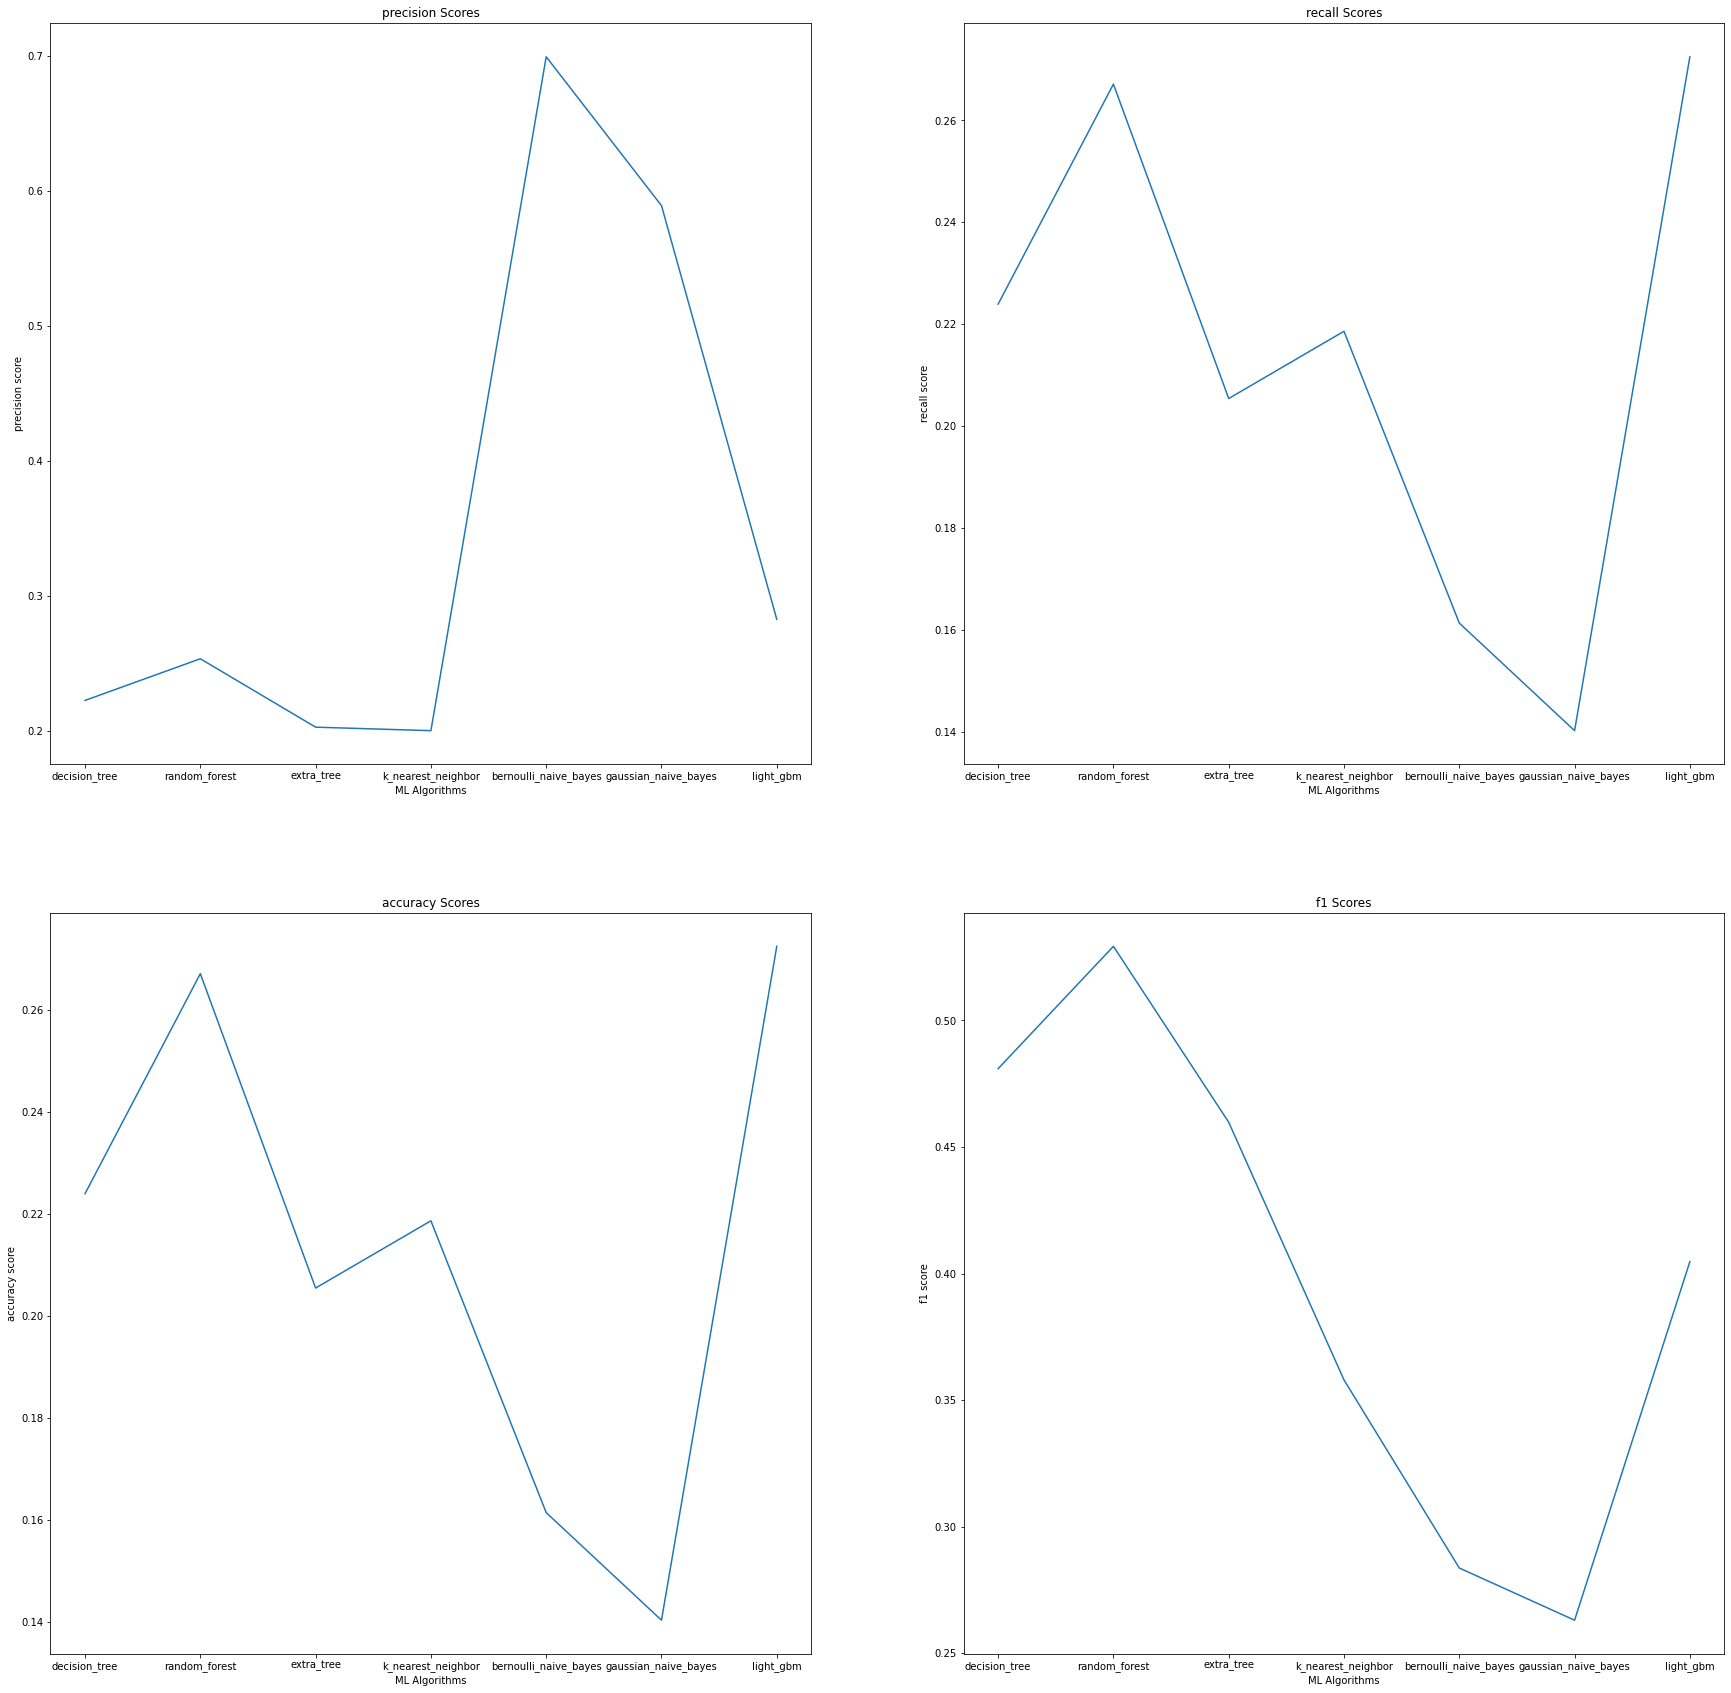

In [218]:
# Set the size of plot
plt.rcParams["figure.figsize"] = (30,30)

# Plot the scores obtained by these algorithms
model_1_results.plotScores()

### 4.2 Prediction of Location of Future Crimes

Use the `date` and the `offence type` to predict where or in which district a particular type of crime can occur.

In [219]:
# Create a copy of the dataset for this modelling

df_model_2 = df_model.copy()

In [220]:
# Handle the NULL values by dropping records that contain them

df_model_2 = df_model_2.dropna()

In [221]:
# Partition the columns into input and output variables for making predictions
# X_2 => Input set of parameters
# Y_2 => Output variable

X_2 = df_model_2[['OFFENSE_CODE','MONTH','DAY_OF_WEEK','HOUR','Day','Night']]
Y_2 = df_model_2['DISTRICT']

In [222]:
# Split the dataframe into random train and test subsets

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(
    X_2,
    Y_2, 
    test_size = 0.1,
    random_state=42
)

print(f"Train Set Shape : ({X_train_2.shape}, {Y_train_2.shape})")
print(f"Test Set Shape : ({X_test_2.shape}, {Y_test_2.shape})")

Train Set Shape : ((186048, 6), (186048,))
Test Set Shape : ((20672, 6), (20672,))


In [223]:
# Create an object to store the results

model_2_results = MLResultsAnalysis()

In [224]:
# Modelling based on different algorithms

DecisionTreeClassifier_Model(X_train_2, Y_train_2, X_test_2, Y_test_2, model_2_results)
RandomForestClassifier_Model(X_train_2, Y_train_2, X_test_2, Y_test_2, model_2_results)
ExtraTreeClassifier_Model(X_train_2, Y_train_2, X_test_2, Y_test_2, model_2_results)
KNearestNeighborsClassifier_Model(X_train_2, Y_train_2, X_test_2, Y_test_2, model_2_results)
BernoulliNB_Model(X_train_2, Y_train_2, X_test_2, Y_test_2, model_2_results)
GaussianNB_Model(X_train_2, Y_train_2, X_test_2, Y_test_2, model_2_results)
LGBM_Model(X_train_2, Y_train_2, X_test_2, Y_test_2, model_2_results)

In [225]:
# Print the results for these algorithms

model_2_results.displayResults()

Decision Tree Classifier
--------------------------------
precision : 0.1368551227354823
recall : 0.14275348297213622
accuracy : 0.14275348297213622
f1 : 0.21988348054876905
---------------------------------------------------------------------------------------------


Random Forest Classifier
--------------------------------
precision : 0.13838894371668414
recall : 0.14807469040247678
accuracy : 0.14807469040247678
f1 : 0.24185443345761062
---------------------------------------------------------------------------------------------


Extra Tree Classifier
--------------------------------
precision : 0.13939395636307764
recall : 0.14468846749226005
accuracy : 0.14468846749226005
f1 : 0.2233521657250471
---------------------------------------------------------------------------------------------


K Nearest Neighbor Classifier
--------------------------------
precision : 0.13748950766050844
recall : 0.14396284829721362
accuracy : 0.14396284829721362
f1 : 0.22423214622197096
------------

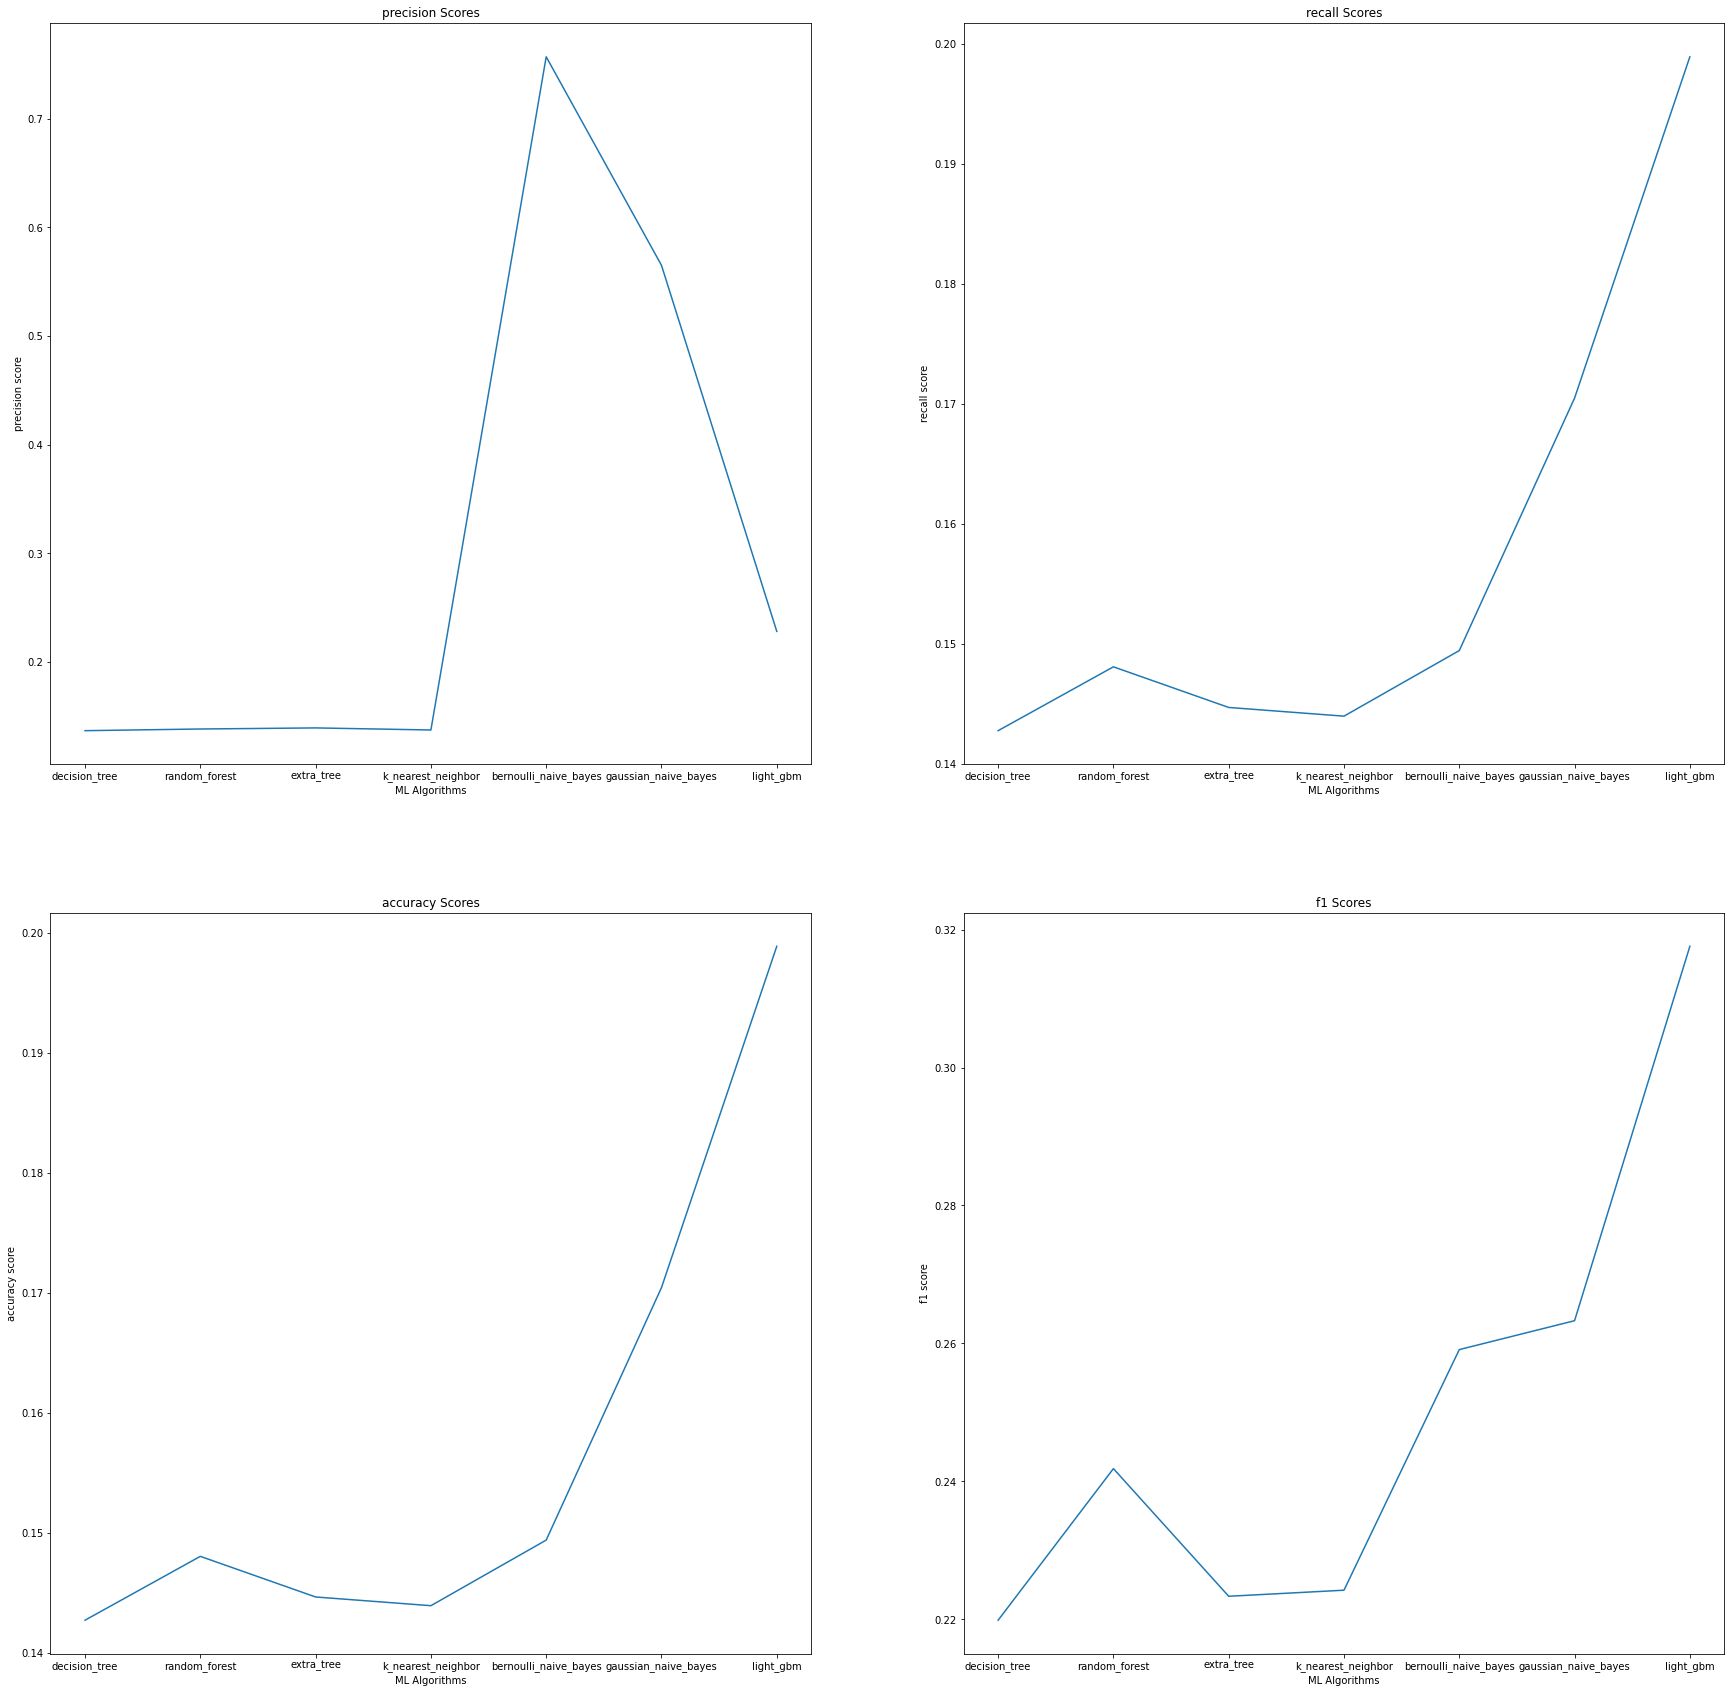

In [226]:
# Set the size of plot
plt.rcParams["figure.figsize"] = (30,30)

# Plot the scores obtained by these algorithms
model_2_results.plotScores()

### 4.3 Prediction of the Seriousness of Crimes in the near Future

This is based on the `UCR` parameter which stands for `Uniform Crime Reporting`

This section deals with the prediction of the seriousness of the crime that might occur at a particular time and location.

The `UCR_PART` has categories like part 1-3, with one being the most serious types of crimes.

In [227]:
# Create a copy of the dataset for this modelling

df_model_3 = df_model.copy()

In [228]:
# Handle the NULL values by dropping records that contain them

df_model_3 = df_model_3.dropna()

In [229]:
# Partition the columns into input and output variables for making predictions
# X_3 => Input set of parameters
# Y_3 => Output variable

X_3 = df_model_3[['DISTRICT','REPORTING_AREA', 'MONTH','DAY_OF_WEEK','HOUR','Lat','Long']]
Y_3 = df_model_3['UCR_PART']

In [230]:
# Split the dataframe into random train and test subsets

X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(
    X_3,
    Y_3, 
    test_size = 0.1,
    random_state=42
)

print(f"Train Set Shape : ({X_train_3.shape}, {Y_train_3.shape})")
print(f"Test Set Shape : ({X_test_3.shape}, {Y_test_3.shape})")

Train Set Shape : ((186048, 7), (186048,))
Test Set Shape : ((20672, 7), (20672,))


In [231]:
# Create an object to store the results

model_3_results = MLResultsAnalysis()

In [232]:
# Modelling based on different algorithms

DecisionTreeClassifier_Model(X_train_3, Y_train_3, X_test_3, Y_test_3, model_3_results)
RandomForestClassifier_Model(X_train_3, Y_train_3, X_test_3, Y_test_3, model_3_results)
ExtraTreeClassifier_Model(X_train_3, Y_train_3, X_test_3, Y_test_3, model_3_results)
KNearestNeighborsClassifier_Model(X_train_3, Y_train_3, X_test_3, Y_test_3, model_3_results)
BernoulliNB_Model(X_train_3, Y_train_3, X_test_3, Y_test_3, model_3_results)
GaussianNB_Model(X_train_3, Y_train_3, X_test_3, Y_test_3, model_3_results)
LGBM_Model(X_train_3, Y_train_3, X_test_3, Y_test_3, model_3_results)

In [233]:
# Print the results for these algorithms

model_3_results.displayResults()

Decision Tree Classifier
--------------------------------
precision : 0.5021713330529384
recall : 0.49443691950464397
accuracy : 0.49443691950464397
f1 : 0.5945687053977681
---------------------------------------------------------------------------------------------


Random Forest Classifier
--------------------------------
precision : 0.5559932968776009
recall : 0.5751741486068112
accuracy : 0.5751741486068112
f1 : 0.6939770787612778
---------------------------------------------------------------------------------------------


Extra Tree Classifier
--------------------------------
precision : 0.4869425583266937
recall : 0.4817627708978328
accuracy : 0.4817627708978328
f1 : 0.5893550525617957
---------------------------------------------------------------------------------------------


K Nearest Neighbor Classifier
--------------------------------
precision : 0.4895833520037012
recall : 0.4927921826625387
accuracy : 0.4927921826625387
f1 : 0.6010874034815188
------------------------

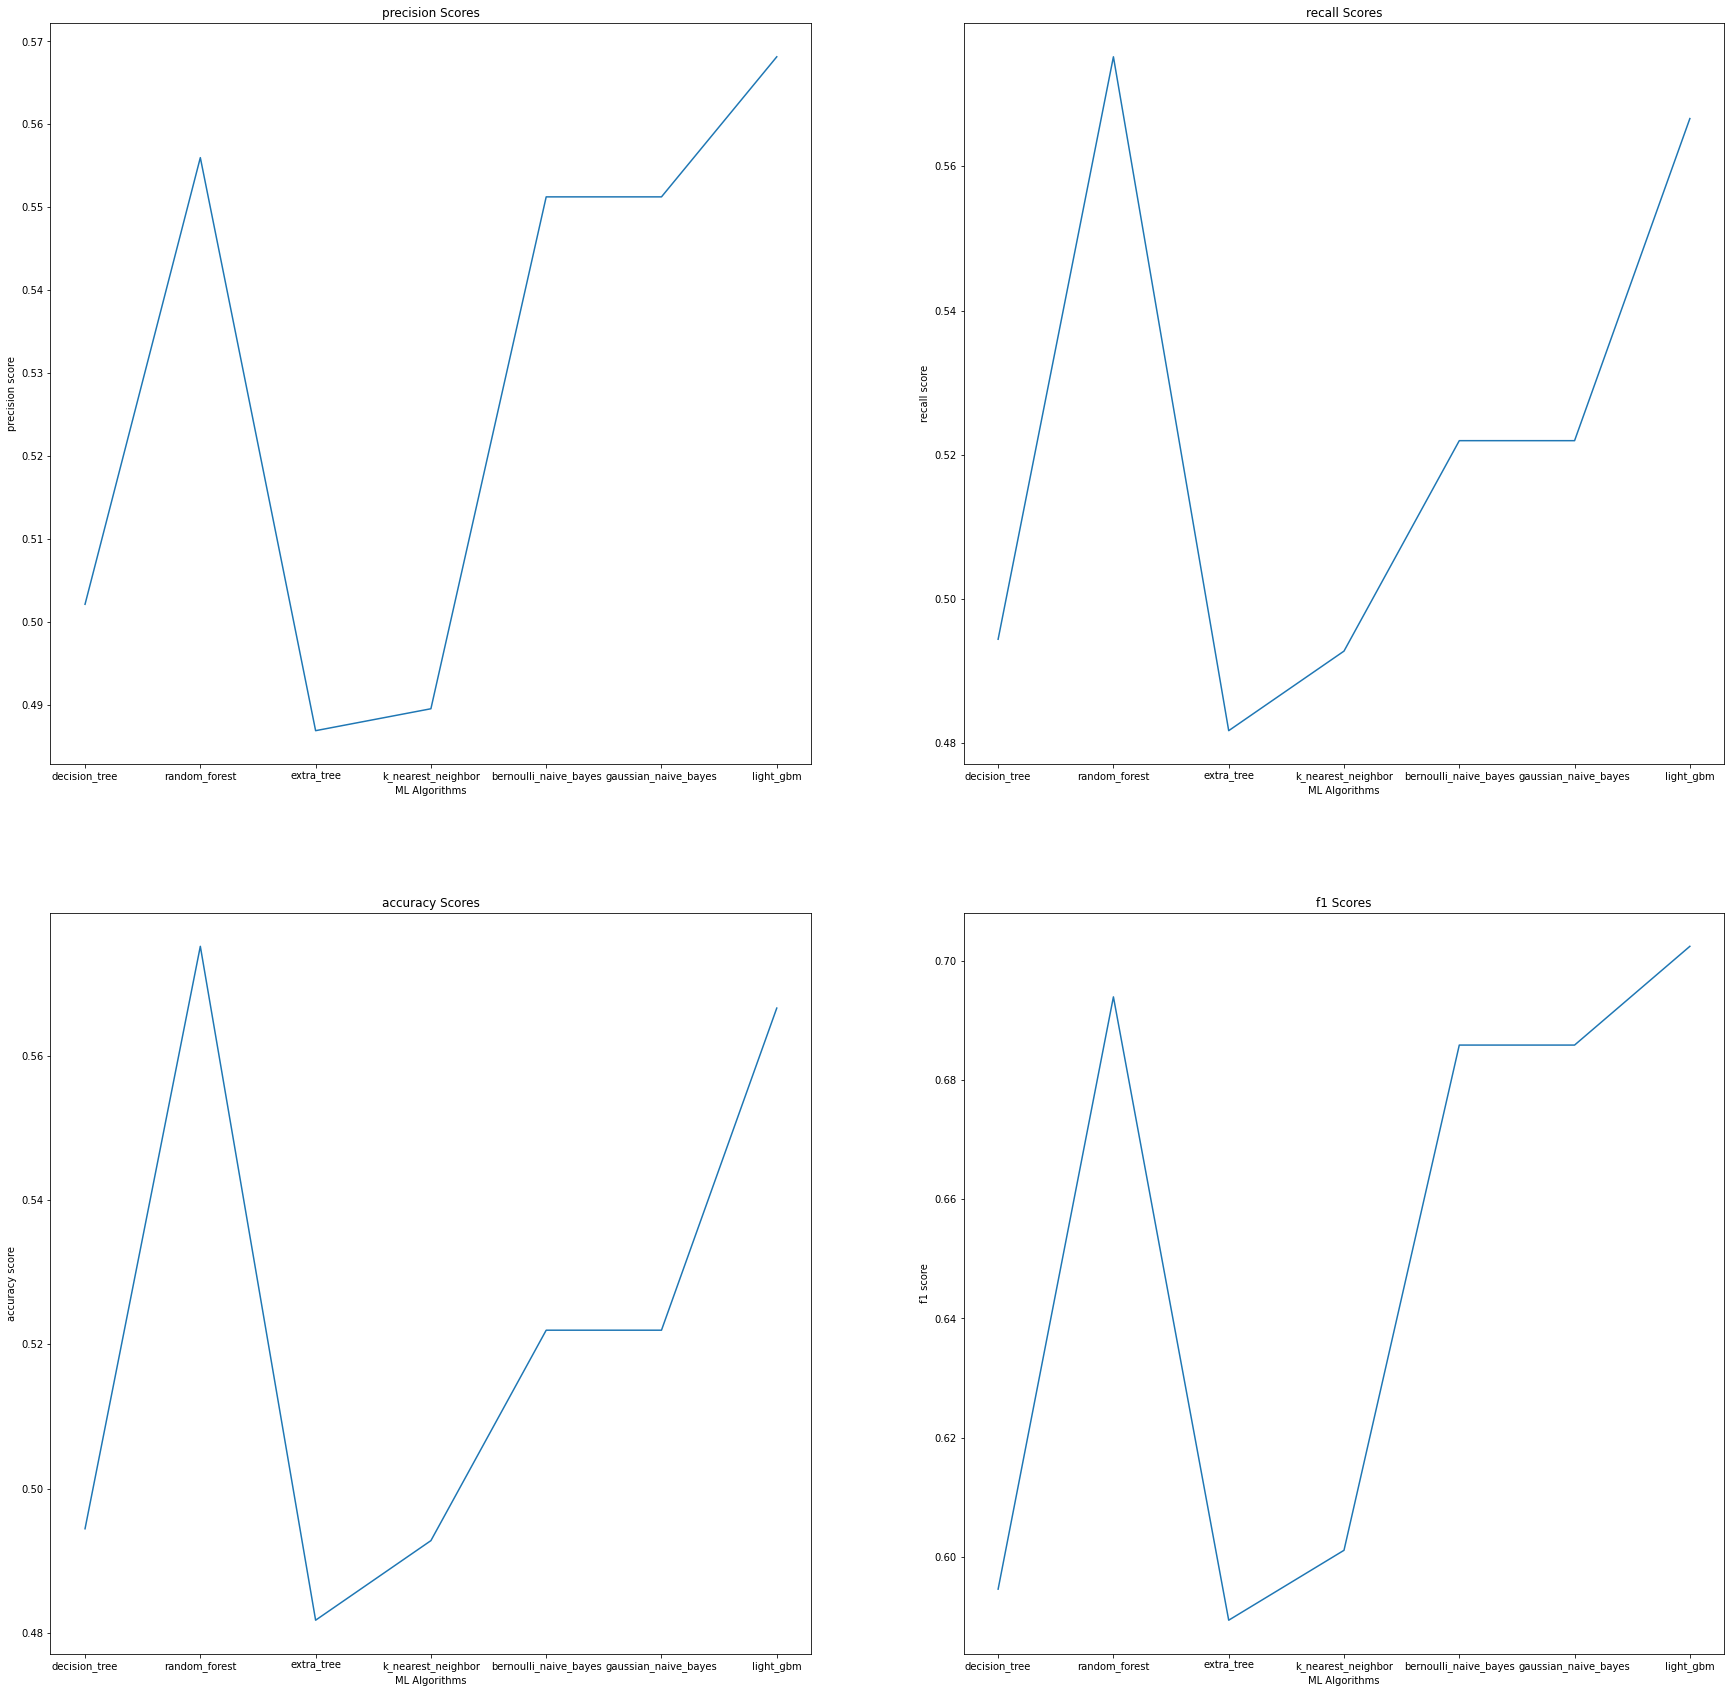

In [234]:
# Set the size of plot
plt.rcParams["figure.figsize"] = (30,30)

# Plot the scores obtained by these algorithms
model_3_results.plotScores()